# Práctica 2

**Nombre:** GUTIERREZ RAMIREZ FELIPE DE JESUS

**e-mail:** felipe.gutierrez5025@alumnos.udg.mx

## MODULES

In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import plotly.graph_objects as go
from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.
* Visualizar con **plotly**.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [3]:
# Init variables
std_motion_steps = 3.0
Levy_exponent = [0.1, 0.5, 1.0, 1.9]
beta = 0.0
resolution = 400

aux_domain = np.linspace(std_motion_steps-3, std_motion_steps+3, resolution)
fig_Levy_pdf = go.Figure()
for i in Levy_exponent:
    Levy_pdf = np.array([levy_stable.pdf(j, alpha=i, beta=beta, loc=std_motion_steps) for j in aux_domain])
    fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                        y = Levy_pdf,
                                        marker = dict(size = 2),
                                        mode = 'lines',
                                        name = 'Levy_{}'.format(i),
                                        showlegend = True))
fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)
* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con matplotlib.

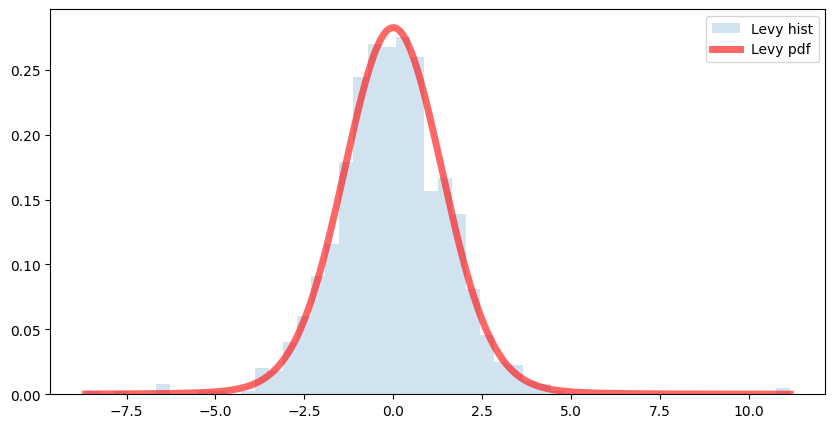

In [21]:
# Init variables
std_motion_steps = 3.0
Levy_exponent = 1.9
beta = 0.0
resolution = 1000


levy_samples = levy_stable.rvs(Levy_exponent, 0, 0, 1,size=resolution)
hist, bins = np.histogram(levy_samples, bins=50, density=True)

aux_domain = np.linspace(min(bins), max(bins), resolution)
Levy_pdf = np.array([levy_stable.pdf(j, alpha=Levy_exponent, beta=beta, loc=0, scale=1) for j in aux_domain])

fig_hist, ax = plt.subplots(1,1)
fig_hist.set_figheight(5)
fig_hist.set_figwidth(10)

ax.hist(levy_samples,bins=bins,density=True,histtype='stepfilled',alpha=0.2, label='Levy hist')
ax.plot(aux_domain,Levy_pdf,'r-',lw=5,alpha=0.6,label='Levy pdf')
ax.legend()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

In [32]:
# Init variables
Levy_exponent = 1.9
n_steps = 1000
s_pos = [0,0]
speed = 6
std_motion_step = 5
velocity = Vec2d(speed,0)

levy = pd.DataFrame(columns=['x_pos', 'y_pos'])

temp_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos':s_pos[1]}])

levy = pd.concat([levy, temp_df], ignore_index=True)

levy_samples = levy_stable.rvs(Levy_exponent, 0, 0, 1,size=n_steps)
levy_direction = levy_stable.rvs(Levy_exponent, 0, 0, 1,size=n_steps)
for i in range(n_steps-1):
  step_length = levy_samples[i] * std_motion_step
  turn_angle = levy_direction[i] * step_length
  velocity = velocity.rotated(turn_angle)
  temp_df = pd.DataFrame([{'x_pos': levy.x_pos[i]+velocity.x, 'y_pos': levy.y_pos[i]+velocity.y}])

  levy = pd.concat([levy, temp_df], ignore_index=True)

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, n_steps)
fig_Levy = go.Figure()
fig_Levy.add_trace(go.Scatter3d(x = levy['x_pos'],
                                       y = levy['y_pos'],
                                       z=aux_domain,
                                       marker = dict(size = 2),
                                       mode = 'lines',
                                       name = 'Levy Flight',
                                       showlegend = True))
fig_Levy.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.

In [39]:
# Init parameters
n_traj = 6
CRW_exponents = [0.2,0.35,0.5,0.65,0.8,0.95]
#CRW_exponents = np.linspace(0.1, 0.9, n_traj)
resolution = 1000
fig_wrapcauchy_pdf = go.Figure()
z = np.linspace(0,2*np.pi, resolution)
data = []
for traj in range(n_traj):
  aux_domain = wrapcauchy.rvs(CRW_exponents[traj], size=resolution, loc=0)
  velocity = Vec2d(1,0)
  pos = Vec2d(0,0)

  cauchy = pd.DataFrame(columns=['x_pos', 'y_pos'])
  temp_df = pd.DataFrame([{'x_pos': pos.x, 'y_pos': pos.y}])
  cauchy = pd.concat([cauchy,temp_df], ignore_index=True)

  for i in range(resolution):
    # Elegir el angulo de giro
    velocity = velocity.rotated(aux_domain[i])
    pos += velocity
    temp_df = pd.DataFrame([{'x_pos': pos.x, 'y_pos': pos.y}])
    cauchy = pd.concat([cauchy,temp_df], ignore_index=True)

  data.append(cauchy)
  fig_wrapcauchy_pdf.add_trace(go.Scatter3d(x=cauchy['x_pos'],
                                          y=cauchy['y_pos'],
                                          z=z,
                                          marker=dict(size=2),
                                          line=dict(width=2),
                                          mode='lines',
                                          name=f'Cauchy {CRW_exponents[traj]}',
                                          showlegend=True))
fig_wrapcauchy_pdf.show()
with open('trayectorias.pkl', 'wb') as f:
    pickle.dump(data, f)